### We study the Mean Squared Displacement in order to characterise the mobility of the participants. We study two different cases:  the heterogeneous case (origint at t=0) and the homogenous case (averaging over all origins). Furthermore, we also perform the study using the original processed data and the interpolated data in order to compare.

### We fit the data with a power-law and we find an almost ballistic behaviour

$\Large MSD(T)=\langle |\vec{r}(t+T)-\vec{r}(t)|^2 \rangle $

# INDEX

    1. MSD(N). Original Data. Heterogeneous case (origin at N=0)
        1.1. Fit exponent gamma
        
    2. MSD(N). Original Data. Homogeneneous case (averaging origins)
        2.1. Fit exponent gamma
        
    3. MSD(T). Interpolated Data. Heterogeneous case (origin at T=0)
        3.1. Fit exponent gamma
        
    4. MSD(T). Interpolated Data. Heterogeneous case (averaging origins)
        4.1. Fit exponent gamma
        
    5. Comparing original and interpolated data. Heterogeneous case
    
    6. Comparing original and interpolated data. Homogeneous case

# 1- MSD(N) Original Data. Heterogeneous case (origin at N=0)

In this case the geolocations are not separated uniformly by 1 second. So we calculate the Mean Squared Displacement using N (consecutive points or locations) instead of time T. 

This is the heterogeneous case, where we calculated the distance between every point with respect to the initial point N=0 (t=0).


In [ ]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle
from math import sin, cos, sqrt, atan2, radians


def potencia(x,a,alpha):  #f(x)=a·x^alpha to fit MSD.
    return a*x**alpha

def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):   #Function that returns the cartesian distance between two GPS locations
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    return e


all_files = glob.glob(os.path.join("*.csv")) #make list of paths for all the csv files (each user)

diff_mean_n_square=[]
interv_conf_95_plus=[]
interv_conf_95_minus=[]

for s in range(600):   #loop for each T (T=1,2,3,...,200)
    
    diff_list2 = [] 
    
    for file in all_files:   #loop for each user file (csv). 
        df = pd.read_csv(file) #read the file
  
        latitude = df['latitude'].tolist()   #latitude and longitude to lists
        longitude = df['longitude'].tolist()
        
        if len(latitude) > s:  #use only those files of lenght > s to compute the MSD (because every user has different lenght)
            
            
            x=latitude[0]
            y=longitude[0]
            z=latitude[s]
            t=longitude[s]                          #|r(s)-r(0)|^2
            diff=getDistanceFromLatLonInM(x,y,z,t)  #computes the distances between the origin (t=0) and the position at "s"
            diff_list2.append(abs(diff)**2)    #append in a list all the distances (squared) # |r(s)-r(0)|^2 for each user
                                 
    
    average_diff2=sum(diff_list2)/len(diff_list2)  # <|r(s)-r(0)|^2> average over users for a given s
    diff_mean_n_square.append(average_diff2)  #we store the averaged result over users for a every s
    
    mean = average_diff2   #mean, variance and standard deviation for the interval confidence
    variance = sum([((xx - mean) ** 2) for xx in diff_list2]) / len(diff_list2)
    stddev = variance ** 0.5
    interv_conf_95_plus.append(mean+((1.960*stddev)/((len(diff_list2))**0.5)))   #interval confidence of 95% (z=1.960)
    interv_conf_95_minus.append(mean-((1.960*stddev)/((len(diff_list2))**0.5)))

list_s=[]
for i in range(600):
    list_s.append(i)

#PLOT THE RESULT FOR THE MSD   
fig, ax1 = pp.subplots(figsize=(7,5))   
ax1.plot(list_s, diff_mean_n_square, '+', label='ordered') 
ax1.fill_between(list_s, interv_conf_95_minus, interv_conf_95_plus, color='b', alpha=.1)
ax1.set_ylabel(r'MSD ($m^2$)',fontsize=14)
ax1.set_xlabel(r'N ',fontsize=14)
ax1.set_yscale('log',basey=10) 
ax1.set_xscale('log',basex=10) 
axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.10,1-0.45,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(list_s, diff_mean_n_square,'+')
axins2.fill_between(list_s, interv_conf_95_minus, interv_conf_95_plus, color='b', alpha=.1)

#np.savetxt('difussion_origin_0.txt', np.array(diff_mean_n_square))
#np.savetxt('CI_95_origin_0_plus.txt',np.array(interv_conf_95_plus))
#np.savetxt('CI_95_origin_0_minus.txt',np.array(interv_conf_95_minus))

pp.show()

## 1.1. Fit exponent gamma

$ MSD(T)= A T^{\gamma}$

<ipython-input-19-78d2bd9138f8>:66: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-19-78d2bd9138f8>:67: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)


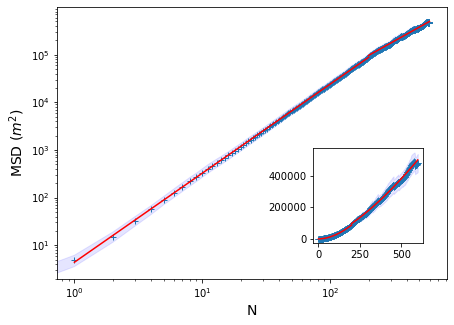

T < 200s: gamma= 1.8688043375088845 +- 0.0032177837395105944
200s < T < 600s: gamma= 1.4976210313786362 +- 0.0064100575366470396


In [19]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle
from math import sin, cos, sqrt, atan2, radians


def potencia(x,a,alpha):   #f(x)=a·x^alpha to fit MSD.
    return a*x**alpha

f=open('difussion_origin_0.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()


f2=open('CI_95_origin_0_plus.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines2=f2.readlines()
ci_plus_origin0=[]
for x2 in lines2:
    ci_plus_origin0.append(float(x2.split('\n')[0]))
f2.close()


f3=open('CI_95_origin_0_minus.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines3=f3.readlines()
ci_minus_origin0=[]
for x3 in lines3:
    ci_minus_origin0.append(float(x3.split('\n')[0]))
f3.close()



list_s=[]
for i in range(600):
    list_s.append(i)

msd=[]
for j in data:
    msd.append(float(j))
    
popt, pcov = curve_fit(potencia, list_s[1:200], msd[1:200], p0=(1,1))
times = np.arange(list_s[1], list_s[200], 0.01)
model = potencia(times, *popt)
perr = np.sqrt(np.diag(pcov))  #calcul error del parametre

popt2, pcov2 = curve_fit(potencia, list_s[200:], msd[200:], p0=(1,1))
times2 = np.arange(list_s[200], list_s[-1], 0.01)
model2 = potencia(times2, *popt2)
perr2= np.sqrt(np.diag(pcov2))  #calcul error del parametre



fig, ax1 = pp.subplots(figsize=(7,5))   
ax1.plot(list_s, msd, '+', label='ordered') 
ax1.fill_between(list_s, ci_minus_origin0, ci_plus_origin0, color='b', alpha=.1)
ax1.set_ylabel('MSD ($m^{2}$)',fontsize=14)
ax1.set_xlabel('N',fontsize=14)
ax1.set_yscale('log',basey=10) 
ax1.set_xscale('log',basex=10) 

axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.60,0.15,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(list_s, msd,'+')
axins2.fill_between(list_s, ci_minus_origin0, ci_plus_origin0, color='b', alpha=.1)

ax1.plot(times, model, '-r', label='ordered') 
ax1.plot(times2, model2, '-r', label='ordered') 
axins2.plot(times, model, '-r', label='ordered')
axins2.plot(times2, model2, '-r', label='ordered')

pp.show()

print('T < 200s:', 'gamma=',popt[1],'+-', perr[1])
print('200s < T < 600s:', 'gamma=',popt2[1],'+-', perr2[1])

# 2- MSD(N) Original Data. Homogeneous case (averaging origins)

In this case the geolocations are not separated uniformly by 1 second. So we calculate the Mean Squared Displacement using N (consecutive points or locations) instead of time T. 

This is the homogeneous case, where we calculated the distance between every point with respect to the initial point N=0, and then we change the initial point to the next one and so one. Finally we average aver all origins (thermalising).


In [ ]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle
from math import sin, cos, sqrt, atan2, radians


def potencia(x,a,alpha):  #f(x)=a·x^alpha to fit MSD.
    return a*x**alpha

def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):   #Function that returns the cartesian distance between two GPS locations
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    return e


all_files = glob.glob(os.path.join("*.csv")) #make list of paths for all the csv files (each user)

diff_mean_s=[]
diff_mean_s_square=[]
interv_conf_95_plus=[]
interv_conf_95_minus=[]

for s in range(1,600):   #loop for each T (T=1,2,3,...,200)
    diff_mean_n=[]
    diff_mean_n_square=[]
    
    for file in all_files:   #loop for each user file (csv). 
        df = pd.read_csv(file) #read the file
        
        latitude = df['latitude'].tolist()   #latitude and longitude to lists
        longitude = df['longitude'].tolist()

        if len(latitude) > s:   #use only those files of lenght > 200 to compute the MSD (almost all of them)
            
            diff_list2 = [] 
            
            for x, y, z, t in zip(latitude[0::], longitude[0::], latitude[s::], longitude[s::]): #|r(t+s)-r(t)|^2
                diff=getDistanceFromLatLonInM(x,y,z,y)  #computes ALL the distances between locations separated "s" timesteps
                diff_list2.append(diff**2)    #append in a list all the distances (squared) # |r(t+s)-r(t)|^2
                                              #for instance, for s=1:  r1-r0, r2-r1, r3-r2, r4-r1 (all 1 step distances)
                                              #for s=2: r2-r0, r3-r1, r4-r2,...etc (for a given individual)
      
            average_diff2=sum(diff_list2)/len(diff_list2)  # <|r(t+s)-r(t)|^2> average over t (for a given s and a given indiv.)
            diff_mean_n_square.append(average_diff2)  #we store the averaged result for each individual in a list (for a given s)
    
    diff_mean_n_square2=sum(diff_mean_n_square)/len(diff_mean_n_square) #Average over users, for a given s.
    diff_mean_s_square.append(diff_mean_n_square2)  #Then for each s, we store the averaged value of users. MSD(s)
    mean = diff_mean_n_square2    #mean, variance and st8andard deviation for the interval confidence
    variance = sum([((xx - mean) ** 2) for xx in diff_mean_n_square]) / len(diff_mean_n_square)
    stddev = variance ** 0.5
    interv_conf_95_plus.append(mean+((1.960*stddev)/((len(diff_mean_n_square))**0.5)))   #interval confidence of 95% (z=1.960)
    interv_conf_95_minus.append(mean-((1.960*stddev)/((len(diff_mean_n_square))**0.5)))

list_s=[]
for i in range(1,600):
    list_s.append(i)

#PLOT THE RESULT FOR THE MSD   
fig, ax1 = pp.subplots(figsize=(7,5))   
ax1.plot(list_s, diff_mean_s_square, '+', label='ordered') 
ax1.fill_between(list_s, interv_conf_95_minus, interv_conf_95_plus, color='b', alpha=.1)
ax1.set_ylabel(r'MSD ($m^2$)',fontsize=14)
ax1.set_xlabel(r'N',fontsize=14)
ax1.set_yscale('log',basey=10) 
ax1.set_xscale('log',basex=10) 
axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.10,1-0.45,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(list_s, diff_mean_s_square,'+')

#np.savetxt('difussion.txt', np.array(diff_mean_s_square))
#np.savetxt('ci_95_msd_homogenous_plus.txt', np.array(interv_conf_95_plus))
#np.savetxt('ci_95_msd_homogenous_minus.txt', np.array(interv_conf_95_minus))

pp.show()

## 2.1. Fit exponent gamma

$ MSD(T)= A T^{\gamma}$

<ipython-input-17-8ff0f7787fdb>:70: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-17-8ff0f7787fdb>:71: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)


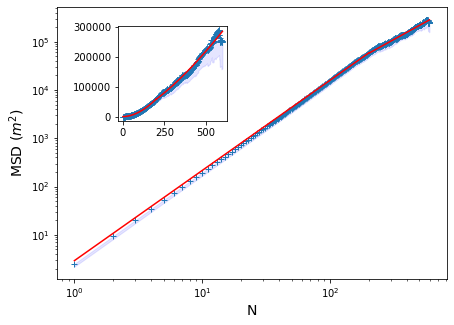

T < 200s: gamma= 1.8691985355982341 +- 0.0055197998766742026
200s < T < 600s: gamma= 1.4577573790744773 +- 0.011257598001667863


In [17]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle
from math import sin, cos, sqrt, atan2, radians


def potencia(x,a,alpha):   #f(x)=a·x^alpha to fit MSD.
    return a*x**alpha

f=open('difussion.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()

f2=open('ci_95_msd_homogenous_plus.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines2=f2.readlines()
data2=[]
for x2 in lines2:
    data2.append(float(x2.split('\n')[0]))
f2.close()

f3=open('ci_95_msd_homogenous_minus.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines3=f3.readlines()
data3=[]
for x3 in lines3:
    data3.append(float(x3.split('\n')[0]))
f3.close()


list_s=[]
for i in range(1,600):
    list_s.append(i)

data2=[]
for j in data:
    data2.append(float(j))
    
msd=np.array(data2)    # msd(s) as an array
ss=np.array(list_s)


#FIT WITH THE LEAST SQUARES METHOD. FOR DIFFERENT REGIONS WE OBTAIN THE EXPONENT OF:  MSD(T) ~ a·T^b
popt, pcov = curve_fit(potencia, ss[1:200], msd[1:200], p0=(1,1))
times = np.arange(ss[0], ss[200], 0.01)
model = potencia(times, *popt)
perr = np.sqrt(np.diag(pcov))  #calcul error del parametre

popt2, pcov2 = curve_fit(potencia, ss[200:], msd[200:], p0=(1,1))
times2 = np.arange(ss[200], ss[-1], 0.01)
model2 = potencia(times2, *popt2)
perr2= np.sqrt(np.diag(pcov2))  #calcul error del parametre


fig, ax1 = pp.subplots(figsize=(7,5))   
ax1.plot(list_s, msd, '+', label='ordered') 
ax1.fill_between(list_s, data3, data2, color='b', alpha=.1)
ax1.plot(times, model, '-r',label='fit')
ax1.plot(times2, model2, '-r',label='fit')

ax1.set_ylabel('MSD ($m^{2}$)',fontsize=14)
ax1.set_xlabel('N',fontsize=14)
ax1.set_yscale('log',basey=10) 
ax1.set_xscale('log',basex=10) 

axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.10,1-0.40,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(list_s, msd,'+')
axins2.fill_between(list_s, data3, data2, color='b', alpha=.1)
axins2.plot(times, model, '-r')
axins2.plot(times2, model2, '-r')


pp.show()


print('T < 200s:', 'gamma=',popt[1],'+-', perr[1])
print('200s < T < 600s:', 'gamma=',popt2[1],'+-', perr2[1])



# 3- MSD(T) Interpolated Data. Heterogeneous case (origin at T=0)

In this case the geolocations are separated uniformly by 1 second. So we calculate the Mean Squared Displacement using the time T.

This is the heterogeneous case, where we calculated the distance between every point with respect to the initial point N=0 (t=0).


In [ ]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle
from math import sin, cos, sqrt, atan2, radians


def potencia(x,a,alpha):  #f(x)=a·x^alpha to fit MSD.
    return a*x**alpha

def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):   #Function that returns the cartesian distance between two GPS locations
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    return e


all_files = glob.glob(os.path.join("*.csv")) #make list of paths for all the csv files (each user)

diff_mean_n_square=[]
interv_conf_95_plus=[]
interv_conf_95_minus=[]

for s in range(600):   #loop for each T (T=1,2,3,...,200)
    
    diff_list2 = [] 
    print(s)
    
    for file in all_files:   #loop for each user file (csv). 
        df = pd.read_csv(file) #read the file
        df2=df.copy() 

        if 'index' in df2:   # if the file has the column index, delete it
            del df2['index']

        df2['time'] = pd.to_datetime(df2['time'])   # Time to datetime format
        df2.index = df2['time']  # Then convert the column time into index
        
        del df2['time']  # delete column time
        del df2['nickname']
        del df2['At']
        del df2['d']
        del df2['v']

        # RESAMPLE INDEX OF TIMES EVERY 1s AND INTERPOLATE MISSING VALUES

        df2=df2.resample('1S').asfreq().interpolate()
        df2.reset_index(level=0, inplace=True)
        
        latitude=df2['latitude'].tolist()
        longitude=df2['longitude'].tolist()
        
        if len(latitude) > s:  #use only those files of lenght > s to compute the MSD (because every user has different lenght)
            
            
            x=latitude[0]
            y=longitude[0]
            z=latitude[s]
            t=longitude[s]                          #|r(s)-r(0)|^2
            diff=getDistanceFromLatLonInM(x,y,z,t)  #computes the distances between the origin (t=0) and the position at "s"
            diff_list2.append(abs(diff)**2)    #append in a list all the distances (squared) # |r(s)-r(0)|^2 for each user
                                 
    
    average_diff2=sum(diff_list2)/len(diff_list2)  # <|r(s)-r(0)|^2> average over users for a given s
    diff_mean_n_square.append(average_diff2)  #we store the averaged result over users for a every s
    
    mean = average_diff2   #mean, variance and standard deviation for the interval confidence
    variance = sum([((xx - mean) ** 2) for xx in diff_list2]) / len(diff_list2)
    stddev = variance ** 0.5
    interv_conf_95_plus.append(mean+((1.960*stddev)/((len(diff_list2))**0.5)))   #interval confidence of 95% (z=1.960)
    interv_conf_95_minus.append(mean-((1.960*stddev)/((len(diff_list2))**0.5)))

list_s=[]
for i in range(600):
    list_s.append(i)

#PLOT THE RESULT FOR THE MSD   
fig, ax1 = pp.subplots(figsize=(7,5))   
ax1.plot(list_s, diff_mean_n_square, '+', label='ordered') 
ax1.fill_between(list_s, interv_conf_95_minus, interv_conf_95_plus, color='b', alpha=.1)
ax1.set_ylabel(r'MSD ($m^2$)',fontsize=14)
ax1.set_xlabel(r'T (s)',fontsize=14)
ax1.set_yscale('log',basey=10) 
ax1.set_xscale('log',basex=10) 
axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.10,1-0.45,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(list_s, diff_mean_n_square,'+')
axins2.fill_between(list_s, interv_conf_95_minus, interv_conf_95_plus, color='b', alpha=.1)

#np.savetxt('difussion_origin_0_interpolation.txt', np.array(diff_mean_n_square))
#np.savetxt('CI_95_origin_0_plus_interpolation.txt',np.array(interv_conf_95_plus))
#np.savetxt('CI_95_origin_0_minus_interpolation.txt',np.array(interv_conf_95_minus))

pp.show()

## 3.1. Fit exponent gamma

$ MSD(T)= A T^{\gamma}$

<ipython-input-13-143263c8b5e9>:67: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-13-143263c8b5e9>:68: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)


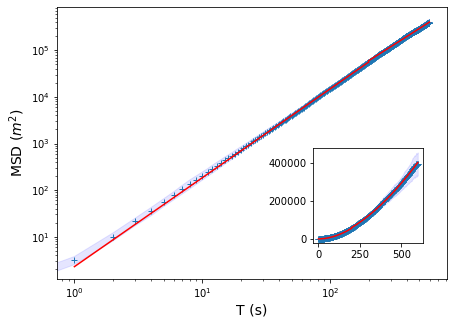

T < 200s: gamma= 1.9072550895131604 +- 0.001295393565118429
200s < T < 600s: gamma= 1.7434621225915354 +- 0.0030605667774263267


In [13]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle
from math import sin, cos, sqrt, atan2, radians


def potencia(x,a,alpha):   #f(x)=a·x^alpha to fit MSD.
    return a*x**alpha

f=open('difussion_origin_0_interpolation.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()


f2=open('CI_95_origin_0_plus_interpolation.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines2=f2.readlines()
ci_plus_origin0_interpolation=[]
for x2 in lines2:
    ci_plus_origin0_interpolation.append(float(x2.split('\n')[0]))
f2.close()


f3=open('CI_95_origin_0_minus_interpolation.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines3=f3.readlines()
ci_minus_origin0_interpolation=[]
for x3 in lines3:
    ci_minus_origin0_interpolation.append(float(x3.split('\n')[0]))
f3.close()



list_s=[]
for i in range(600):
    list_s.append(i)

msd=[]
for j in data:
    msd.append(float(j))
    
    
popt, pcov = curve_fit(potencia, list_s[1:200], msd[1:200], p0=(1,1))
times = np.arange(list_s[1], list_s[200], 0.01)
model = potencia(times, *popt)
perr = np.sqrt(np.diag(pcov))  #calcul error del parametre

popt2, pcov2 = curve_fit(potencia, list_s[200:], msd[200:], p0=(1,1))
times2 = np.arange(list_s[200], list_s[-1], 0.01)
model2 = potencia(times2, *popt2)
perr2 = np.sqrt(np.diag(pcov2))  #calcul error del parametre



fig, ax1 = pp.subplots(figsize=(7,5))   
ax1.plot(list_s, msd, '+', label='interpolated data')
ax1.fill_between(list_s, ci_minus_origin0_interpolation, ci_plus_origin0_interpolation, color='b', alpha=.1)
ax1.set_ylabel('MSD ($m^{2}$)',fontsize=14)
ax1.set_xlabel('T (s)',fontsize=14)
ax1.set_yscale('log',basey=10) 
ax1.set_xscale('log',basex=10) 

axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.60,0.15,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(list_s, msd,'+')
axins2.fill_between(list_s, ci_minus_origin0_interpolation, ci_plus_origin0_interpolation, color='b', alpha=.1)

ax1.plot(times, model, '-r', label='ordered') 
ax1.plot(times2, model2, '-r', label='ordered') 
axins2.plot(times, model, '-r', label='ordered')
axins2.plot(times2, model2, '-r', label='ordered')
#pp.savefig("msd.svg")
pp.show()

print('T < 200s:', 'gamma=',popt[1],'+-', perr[1])
print('200s < T < 600s:', 'gamma=',popt2[1],'+-', perr2[1])


# 4- MSD(T) Interpolated Data. Homogeneous case (averaging origins)

In this case the geolocations are separated uniformly by 1 second. So we calculate the Mean Squared Displacement using the time T.

This is the homogeneous case, where we calculated the distance between every point with respect to the initial point T=0, and then we change the initial point to the next one and so one. Finally we average aver all origins (thermalising).


In [ ]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle
from math import sin, cos, sqrt, atan2, radians


def potencia(x,a,alpha):  #f(x)=a·x^alpha to fit MSD.
    return a*x**alpha

def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):   #Function that returns the cartesian distance between two GPS locations
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    return e


all_files = glob.glob(os.path.join("*.csv")) #make list of paths for all the csv files (each user)

diff_mean_s=[]
diff_mean_s_square=[]
interv_conf_95_plus=[]
interv_conf_95_minus=[]

for s in range(1,600):   #loop for each T (T=1,2,3,...,200)
    diff_mean_n=[]
    diff_mean_n_square=[]
    print(s)
    for file in all_files:   #loop for each user file (csv). 
        df = pd.read_csv(file) #read the file     
        df2=df.copy() 

        if 'index' in df2:   # if the file has the column index, delete it
            del df2['index']

        df2['time'] = pd.to_datetime(df2['time'])   # Time to datetime format
        df2.index = df2['time']  # Then convert the column time into index
        
        del df2['time']  # delete column time
        del df2['nickname']
        del df2['At']
        del df2['d']
        del df2['v']

        
        # RESAMPLE INDEX OF TIMES EVERY 1s AND INTERPOLATE MISSING VALUES

        df2=df2.resample('1S').asfreq().interpolate()
        df2.reset_index(level=0, inplace=True)

        
        latitude=df2['latitude'].tolist()
        longitude=df2['longitude'].tolist()
        

        if len(latitude) > s:   #use only those files of lenght > 200 to compute the MSD (almost all of them)
            
            diff_list2 = [] 
            
            for x, y, z, t in zip(latitude[0::], longitude[0::], latitude[s::], longitude[s::]): #|r(t+s)-r(t)|^2
                diff=getDistanceFromLatLonInM(x,y,z,y)  #computes ALL the distances between locations separated "s" timesteps
                diff_list2.append(diff**2)    #append in a list all the distances (squared) # |r(t+s)-r(t)|^2
                                              #for instance, for s=1:  r1-r0, r2-r1, r3-r2, r4-r1 (all 1 step distances)
                                              #for s=2: r2-r0, r3-r1, r4-r2,...etc (for a given individual)
      
            average_diff2=sum(diff_list2)/len(diff_list2)  # <|r(t+s)-r(t)|^2> average over t (for a given s and a given indiv.)
            diff_mean_n_square.append(average_diff2)  #we store the averaged result for each individual in a list (for a given s)
    
    diff_mean_n_square2=sum(diff_mean_n_square)/len(diff_mean_n_square) #Average over users, for a given s.
    diff_mean_s_square.append(diff_mean_n_square2)  #Then for each s, we store the averaged value of users. MSD(s)
    mean = diff_mean_n_square2    #mean, variance and st8andard deviation for the interval confidence
    variance = sum([((xx - mean) ** 2) for xx in diff_mean_n_square]) / len(diff_mean_n_square)
    stddev = variance ** 0.5
    interv_conf_95_plus.append(mean+((1.960*stddev)/((len(diff_mean_n_square))**0.5)))   #interval confidence of 95% (z=1.960)
    interv_conf_95_minus.append(mean-((1.960*stddev)/((len(diff_mean_n_square))**0.5)))

list_s=[]
for i in range(1,600):
    list_s.append(i)

#PLOT THE RESULT FOR THE MSD   
fig, ax1 = pp.subplots(figsize=(7,5))   
ax1.plot(list_s, diff_mean_s_square, '+', label='ordered') 
ax1.fill_between(list_s, interv_conf_95_minus, interv_conf_95_plus, color='b', alpha=.1)
ax1.set_ylabel(r'MSD ($m^2$)',fontsize=14)
ax1.set_xlabel(r'T (s)',fontsize=14)
ax1.set_yscale('log',basey=10) 
ax1.set_xscale('log',basex=10) 
axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.10,1-0.45,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(list_s, diff_mean_s_square,'+')

#np.savetxt('difussion_interpolation.txt', np.array(diff_mean_s_square))
#np.savetxt('ci_95_msd_homogenous_plus_interpolation.txt', np.array(interv_conf_95_plus))
#np.savetxt('ci_95_msd_homogenous_minus_interpolation.txt', np.array(interv_conf_95_minus))

pp.show()

## 4.1. Fit exponent gamma

$ MSD(T)= A T^{\gamma}$

<ipython-input-23-a47a29bc89ef>:68: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-23-a47a29bc89ef>:69: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)


T < 200s: gamma= 1.9470067321323263 +- 0.0011160713729166016
200s < T < 600s: gamma= 1.5767871282091228 +- 0.008546092451748189


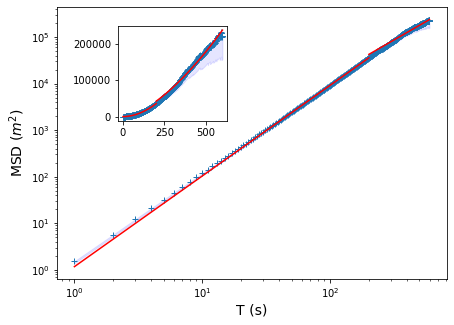

In [23]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle
from math import sin, cos, sqrt, atan2, radians


def potencia(x,a,alpha):   #f(x)=a·x^alpha to fit MSD.
    return a*x**alpha

f=open('difussion_interpolation.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()

f2=open('ci_95_msd_homogenous_plus_interpolation.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines2=f2.readlines()
data2=[]
for x2 in lines2:
    data2.append(float(x2.split('\n')[0]))
f2.close()

f3=open('ci_95_msd_homogenous_minus_interpolation.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines3=f3.readlines()
data3=[]
for x3 in lines3:
    data3.append(float(x3.split('\n')[0]))
f3.close()


list_s=[]
for i in range(1,600):
    list_s.append(i)

data2=[]
for j in data:
    data2.append(float(j))
    
msd=np.array(data2)    # msd(s) as an array
ss=np.array(list_s)


#FIT WITH THE LEAST SQUARES METHOD. FOR DIFFERENT REGIONS WE OBTAIN THE EXPONENT OF:  MSD(T) ~ a·T^b
popt, pcov = curve_fit(potencia, ss[0:200], msd[0:200], p0=(1,1))
times = np.arange(ss[0], ss[200], 0.01)
model = potencia(times, *popt)
perr = np.sqrt(np.diag(pcov))  #calcul error del parametre

popt2, pcov2 = curve_fit(potencia, ss[200:], msd[200:], p0=(1,1))
times2 = np.arange(ss[200], ss[-1], 0.01)
model2 = potencia(times2, *popt2)
perr2= np.sqrt(np.diag(pcov2))  #calcul error del parametre

fig, ax1 = pp.subplots(figsize=(7,5))   
ax1.plot(list_s, msd, '+', label='ordered') 
ax1.fill_between(list_s, data3, data2, color='b', alpha=.1)
ax1.plot(times, model, '-r',label='fit')
ax1.plot(times2, model2, '-r',label='fit')
ax1.set_ylabel('MSD ($m^{2}$)',fontsize=14)
ax1.set_xlabel('T (s)',fontsize=14)
ax1.set_yscale('log',basey=10) 
ax1.set_xscale('log',basex=10) 

axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.10,1-0.40,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(list_s, msd,'+')
axins2.fill_between(list_s, data3, data2, color='b', alpha=.1)
axins2.plot(times, model, '-r')
axins2.plot(times2, model2, '-r')


print('T < 200s:', 'gamma=',popt[1],'+-', perr[1])
print('200s < T < 600s:', 'gamma=',popt2[1],'+-', perr2[1])

pp.show()



# 5- Comparing original and interpolated data. Heterogeneous case

<ipython-input-28-7c07f837b33d>:106: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-28-7c07f837b33d>:107: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)


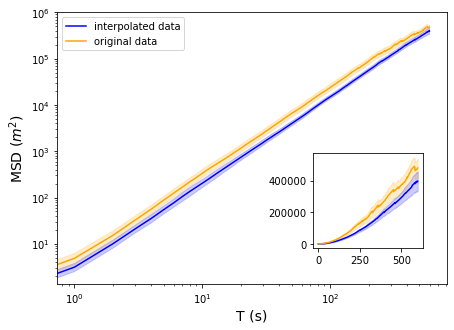

Original data

T < 200s: gamma= 1.8688043375088845 +- 0.0032177837395105944
200s < T < 600s: gamma= 1.4976210313786362 +- 0.0064100575366470396


Interpolated data

T < 200s: gamma= 1.9072550895131604 +- 0.001295393565118429
200s < T < 600s: gamma= 1.7434621225915354 +- 0.0030605667774263267


In [28]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle
from math import sin, cos, sqrt, atan2, radians


def potencia(x,a,alpha):   #f(x)=a·x^alpha to fit MSD.
    return a*x**alpha

f=open('difussion_origin_0_interpolation.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
f_original=open('difussion_origin_0.txt',"r")
lines=f.readlines()
lines_original=f_original.readlines()
data=[]
data_original=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()

for xx in lines_original:
    data_original.append(xx.split('\n')[0])
f_original.close()


f2=open('CI_95_origin_0_plus_interpolation.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines2=f2.readlines()
ci_plus_origin0_interpolation=[]
for x2 in lines2:
    ci_plus_origin0_interpolation.append(float(x2.split('\n')[0]))
f2.close()


f3=open('CI_95_origin_0_minus_interpolation.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines3=f3.readlines()
ci_minus_origin0_interpolation=[]
for x3 in lines3:
    ci_minus_origin0_interpolation.append(float(x3.split('\n')[0]))
f3.close()


f4=open('CI_95_origin_0_plus.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines4=f4.readlines()
ci_plus_origin0=[]
for x4 in lines4:
    ci_plus_origin0.append(float(x4.split('\n')[0]))
f4.close()


f5=open('CI_95_origin_0_minus.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines5=f5.readlines()
ci_minus_origin0=[]
for x5 in lines5:
    ci_minus_origin0.append(float(x5.split('\n')[0]))
f5.close()




list_s=[]
for i in range(600):
    list_s.append(i)

msd=[]
for j in data:
    msd.append(float(j))
    
msd_original=[]
for jj in data_original:
    msd_original.append(float(jj))
    
popt, pcov = curve_fit(potencia, list_s[1:200], msd[1:200], p0=(1,1))
times = np.arange(list_s[1], list_s[200], 0.01)
model = potencia(times, *popt)
perr = np.sqrt(np.diag(pcov))  #calcul error del parametre

popt2, pcov2 = curve_fit(potencia, list_s[200:], msd[200:], p0=(1,1))
times2 = np.arange(list_s[200], list_s[-1], 0.01)
model2 = potencia(times2, *popt2)
perr2= np.sqrt(np.diag(pcov2))  #calcul error del parametre


popt3, pcov3 = curve_fit(potencia, list_s[1:200], msd_original[1:200], p0=(1,1))
times3 = np.arange(list_s[1], list_s[200], 0.01)
model3 = potencia(times3, *popt3)
perr3 = np.sqrt(np.diag(pcov3))  #calcul error del parametre

popt4, pcov4 = curve_fit(potencia, list_s[200:], msd_original[200:], p0=(1,1))
times4 = np.arange(list_s[200], list_s[-1], 0.01)
model4 = potencia(times4, *popt4)
perr4 = np.sqrt(np.diag(pcov4))  #calcul error del parametre


fig, ax1 = pp.subplots(figsize=(7,5))   
ax1.plot(list_s, msd, '-', color='b',label='interpolated data')
ax1.fill_between(list_s, ci_minus_origin0_interpolation, ci_plus_origin0_interpolation, color='b', alpha=.2)
ax1.plot(list_s, msd_original,'-',color='orange',label='original data')
ax1.fill_between(list_s, ci_minus_origin0, ci_plus_origin0, color='orange', alpha=.2)
ax1.set_ylabel('MSD ($m^{2}$)',fontsize=14)
ax1.set_xlabel('T (s)',fontsize=14)
ax1.set_yscale('log',basey=10) 
ax1.set_xscale('log',basex=10) 

axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.60,0.15,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(list_s, msd,'-',color='b')
axins2.plot(list_s,msd_original,'-',color='orange')
axins2.fill_between(list_s, ci_minus_origin0_interpolation, ci_plus_origin0_interpolation, color='b', alpha=.2)
axins2.fill_between(list_s, ci_minus_origin0, ci_plus_origin0, color='orange', alpha=.2)

#ax1.plot(times, model, '-r', label='ordered') 
#ax1.plot(times2, model2, '-r', label='ordered') 
#ax1.plot(times3, model3, '-r', label='ordered') 
#ax1.plot(times4, model4, '-r', label='ordered') 
#ax1.plot(times5, model5, '-r', label='ordered')
#ax1.plot(times6, model6, '-r', label='ordered') 
#axins2.plot(times, model, '-r', label='ordered')
#axins2.plot(times2, model2, '-r', label='ordered')
#axins2.plot(times3, model3, '-r', label='ordered')
#axins2.plot(times6, model6, '-r', label='ordered')
ax1.legend()
pp.show()


print('Original data')
print('')
print('T < 200s:', 'gamma=',popt3[1],'+-', perr3[1])
print('200s < T < 600s:', 'gamma=',popt4[1],'+-', perr4[1])

print('')
print('')

print('Interpolated data')
print('')
print('T < 200s:', 'gamma=',popt[1],'+-', perr[1])
print('200s < T < 600s:', 'gamma=',popt2[1],'+-', perr2[1])


# 6- Comparing original and interpolated data. Homogeneous case

<ipython-input-30-d2fee43ab17c>:105: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-30-d2fee43ab17c>:106: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)


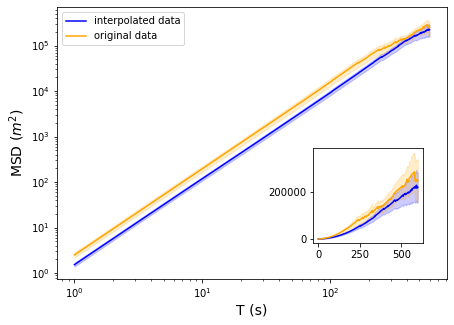

Original data

T < 200s: gamma= 1.8691985355982341 +- 0.0055197998766742026
200s < T < 600s: gamma= 1.4577573790744773 +- 0.011257598001667863


Interpolated data

T < 200s: gamma= 1.947006733545394 +- 0.0011189003292993332
200s < T < 600s: gamma= 1.5767871282091228 +- 0.008546092451748189


In [30]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle
from math import sin, cos, sqrt, atan2, radians


def potencia(x,a,alpha):   #f(x)=a·x^alpha to fit MSD.
    return a*x**alpha

f=open('difussion_interpolation.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
f_original=open('difussion.txt',"r")
lines=f.readlines()
lines_original=f_original.readlines()
data=[]
data_original=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()

for xx in lines_original:
    data_original.append(xx.split('\n')[0])
f_original.close()


f2=open('ci_95_msd_homogenous_plus_interpolation.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines2=f2.readlines()
ci_plus_origin0_interpolation=[]
for x2 in lines2:
    ci_plus_origin0_interpolation.append(float(x2.split('\n')[0]))
f2.close()


f3=open('ci_95_msd_homogenous_minus_interpolation.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines3=f3.readlines()
ci_minus_origin0_interpolation=[]
for x3 in lines3:
    ci_minus_origin0_interpolation.append(float(x3.split('\n')[0]))
f3.close()


f4=open('ci_95_msd_homogenous_plus.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines4=f4.readlines()
ci_plus_origin0=[]
for x4 in lines4:
    ci_plus_origin0.append(float(x4.split('\n')[0]))
f4.close()


f5=open('ci_95_msd_homogenous_minus.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines5=f5.readlines()
ci_minus_origin0=[]
for x5 in lines5:
    ci_minus_origin0.append(float(x5.split('\n')[0]))
f5.close()


list_s=[]
for i in range(1,600):
    list_s.append(i)

msd=[]
for j in data:
    msd.append(float(j))
    
msd_original=[]
for jj in data_original:
    msd_original.append(float(jj))
    

popt, pcov = curve_fit(potencia, list_s[1:200], msd[1:200], p0=(1,1))
times = np.arange(list_s[1], list_s[200], 0.01)
model = potencia(times, *popt)
perr = np.sqrt(np.diag(pcov))  #calcul error del parametre

popt2, pcov2 = curve_fit(potencia, list_s[200:], msd[200:], p0=(1,1))
times2 = np.arange(list_s[200], list_s[-1], 0.01)
model2 = potencia(times2, *popt2)
perr2= np.sqrt(np.diag(pcov2))  #calcul error del parametre


popt3, pcov3 = curve_fit(potencia, list_s[1:200], msd_original[1:200], p0=(1,1))
times3 = np.arange(list_s[1], list_s[200], 0.01)
model3 = potencia(times3, *popt3)
perr3 = np.sqrt(np.diag(pcov3))  #calcul error del parametre

popt4, pcov4 = curve_fit(potencia, list_s[200:], msd_original[200:], p0=(1,1))
times4 = np.arange(list_s[200], list_s[-1], 0.01)
model4 = potencia(times4, *popt4)
perr4 = np.sqrt(np.diag(pcov4))  #calcul error del parametre


fig, ax1 = pp.subplots(figsize=(7,5))   
ax1.plot(list_s, msd, '-', color='b',label='interpolated data')
ax1.fill_between(list_s, ci_minus_origin0_interpolation, ci_plus_origin0_interpolation, color='b', alpha=.2)
ax1.plot(list_s, msd_original,'-',color='orange',label='original data')
ax1.fill_between(list_s, ci_minus_origin0, ci_plus_origin0, color='orange', alpha=.2)
ax1.set_ylabel('MSD ($m^{2}$)',fontsize=14)
ax1.set_xlabel('T (s)',fontsize=14)
ax1.set_yscale('log',basey=10) 
ax1.set_xscale('log',basex=10) 

axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.60,0.15,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(list_s, msd,'-',color='b')
axins2.plot(list_s,msd_original,'-',color='orange')
axins2.fill_between(list_s, ci_minus_origin0_interpolation, ci_plus_origin0_interpolation, color='b', alpha=.2)
axins2.fill_between(list_s, ci_minus_origin0, ci_plus_origin0, color='orange', alpha=.2)

ax1.legend()
pp.show()


print('Original data')
print('')
print('T < 200s:', 'gamma=',popt3[1],'+-', perr3[1])
print('200s < T < 600s:', 'gamma=',popt4[1],'+-', perr4[1])

print('')
print('')

print('Interpolated data')
print('')
print('T < 200s:', 'gamma=',popt[1],'+-', perr[1])
print('200s < T < 600s:', 'gamma=',popt2[1],'+-', perr2[1])